# CHAPTER 1: ECONOMIC GROWTH EVIDENCE

**NOTE:** This has been written by Oscar Alvarenga as a summary in the compilation of economic lectures "A First Course in Quantitative Economics with Python" by Thomas J. Sargent & John Stachurski.<br>
**ORIGINAL AND COMPLETE REFERENCE:** [Economic Growth Evidence](https://intro.quantecon.org/long_run_growth.html#overview)

## Keypoints

- Explaining growth facts is a principal purpose of "Development Economics" and "Economic History"
- Growth facts are also important inputs for historians' studies of geopolitical forces and dynamics. A great and contemporary example can be found in the book of Ray Dalio: `Dalio R. Principles for Dealing with the Changing World Order. New York: Simon & Schuster; 2021. http://public.eblib.com/choice/PublicFullRecord.aspx?p=6803383. Accessed October 30 2023.`
- Growth facts can also help companies understand the trends and economical paths of the countries they are investing or planning to invest. They can also help to adapt to rising market conditions.

## Objectives:

- In this chapter there was a review of growth trajectories of various countries over long periods.
- Analysis of total GDP and GDP Per Capita will be performed to notice the economical evolution of countries with changing populations and different sizes.

## Setting Up

### 1) Importing packages

In [2]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple
from matplotlib.lines import Line2D

### 2) Setting up

The __[2020 data](https://intro.quantecon.org/_downloads/e6a877d92ac60529ff17d034840c0c83/mpd2020.xlsx)__ from the project initiated by __[Angus Maddison](https://en.wikipedia.org/wiki/Angus_Maddison)__ has been shared by the QuantEcon team in `Excel` Format. <br>
<br>
We will read it as a pandas dataframe:

In [8]:
os.getcwd()

'C:\\Users\\oscar\\Documents\\Oscar\\Personales\\QuantEcon\\Python\\QuantEcon Blog\\1 Economic Growth Evidence'

In [18]:
data = pd.read_excel("./datasets/mpd2020.xlsx", sheet_name="Full data")
data

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.00000
1,AFG,Afghanistan,1870,NaN,4207.00000
2,AFG,Afghanistan,1913,NaN,5730.00000
3,AFG,Afghanistan,1950,1156.0000,8150.00000
4,AFG,Afghanistan,1951,1170.0000,8284.00000
...,...,...,...,...,...
21677,ZWE,Zimbabwe,2014,1594.0000,13313.99205
21678,ZWE,Zimbabwe,2015,1560.0000,13479.13812
21679,ZWE,Zimbabwe,2016,1534.0000,13664.79457
21680,ZWE,Zimbabwe,2017,1582.3662,13870.26413


#### Variables in *Data*
- gdppc: GDP Per Capita
- pop: Population

Number of countries:

In [19]:
len(data.country.unique())

169

Looping over countries to understand the available years:

In [20]:
country_years = []
for country in data.country.unique():
    cy_data = data[data.country == country]["year"]
    ymin, ymax = cy_data.min(), cy_data.max()
    country_years.append((country, ymin, ymax))

country_years = pd.DataFrame(country_years,\
                             columns=["country", "Min Year", "Max Year"])\
                            .set_index("country")
country_years

,Min Year,Max Year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018
...,...,...
Yemen,1820,2018
Former Yugoslavia,1,2018
South Africa,1,2018


#### Reshaping the original data

Convenient variables to enable quicker access to countries time series data. <br>
Mapping between country codes and country names in the dataset:

In [41]:
code_to_name = data[["countrycode", "country"]].drop_duplicates()\
                .reset_index(drop=True).set_index(["countrycode"])
code_to_name

,country
countrycode,
AFG,Afghanistan
AGO,Angola
ALB,Albania
ARE,United Arab Emirates
ARG,Argentina
...,...
YEM,Yemen
YUG,Former Yugoslavia
ZAF,South Africa


Now it's possible to focus quicker on GDP per Capita

In [24]:
gdppc = data.set_index(["countrycode", "year"])["gdppc"]
gdppc = gdppc.unstack("countrycode")
gdppc

countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000


It's also possible to create a color mapping between country codes and colors.<br>
This is done for consistency:

In [25]:
country_names = data["countrycode"]

# Generate colormap with the number of colors matching the number of countries
colors = cm.tab20(np.linspace(0, 0.95, len(country_names)))

# Create a dictionary to map each country to it's corresponding color
color_mapping = {country: color for country, color in zip(country_names, colors)}

### 3) GDP Plots

Using the United Kingdom to confirm that we are using the correct country codes:

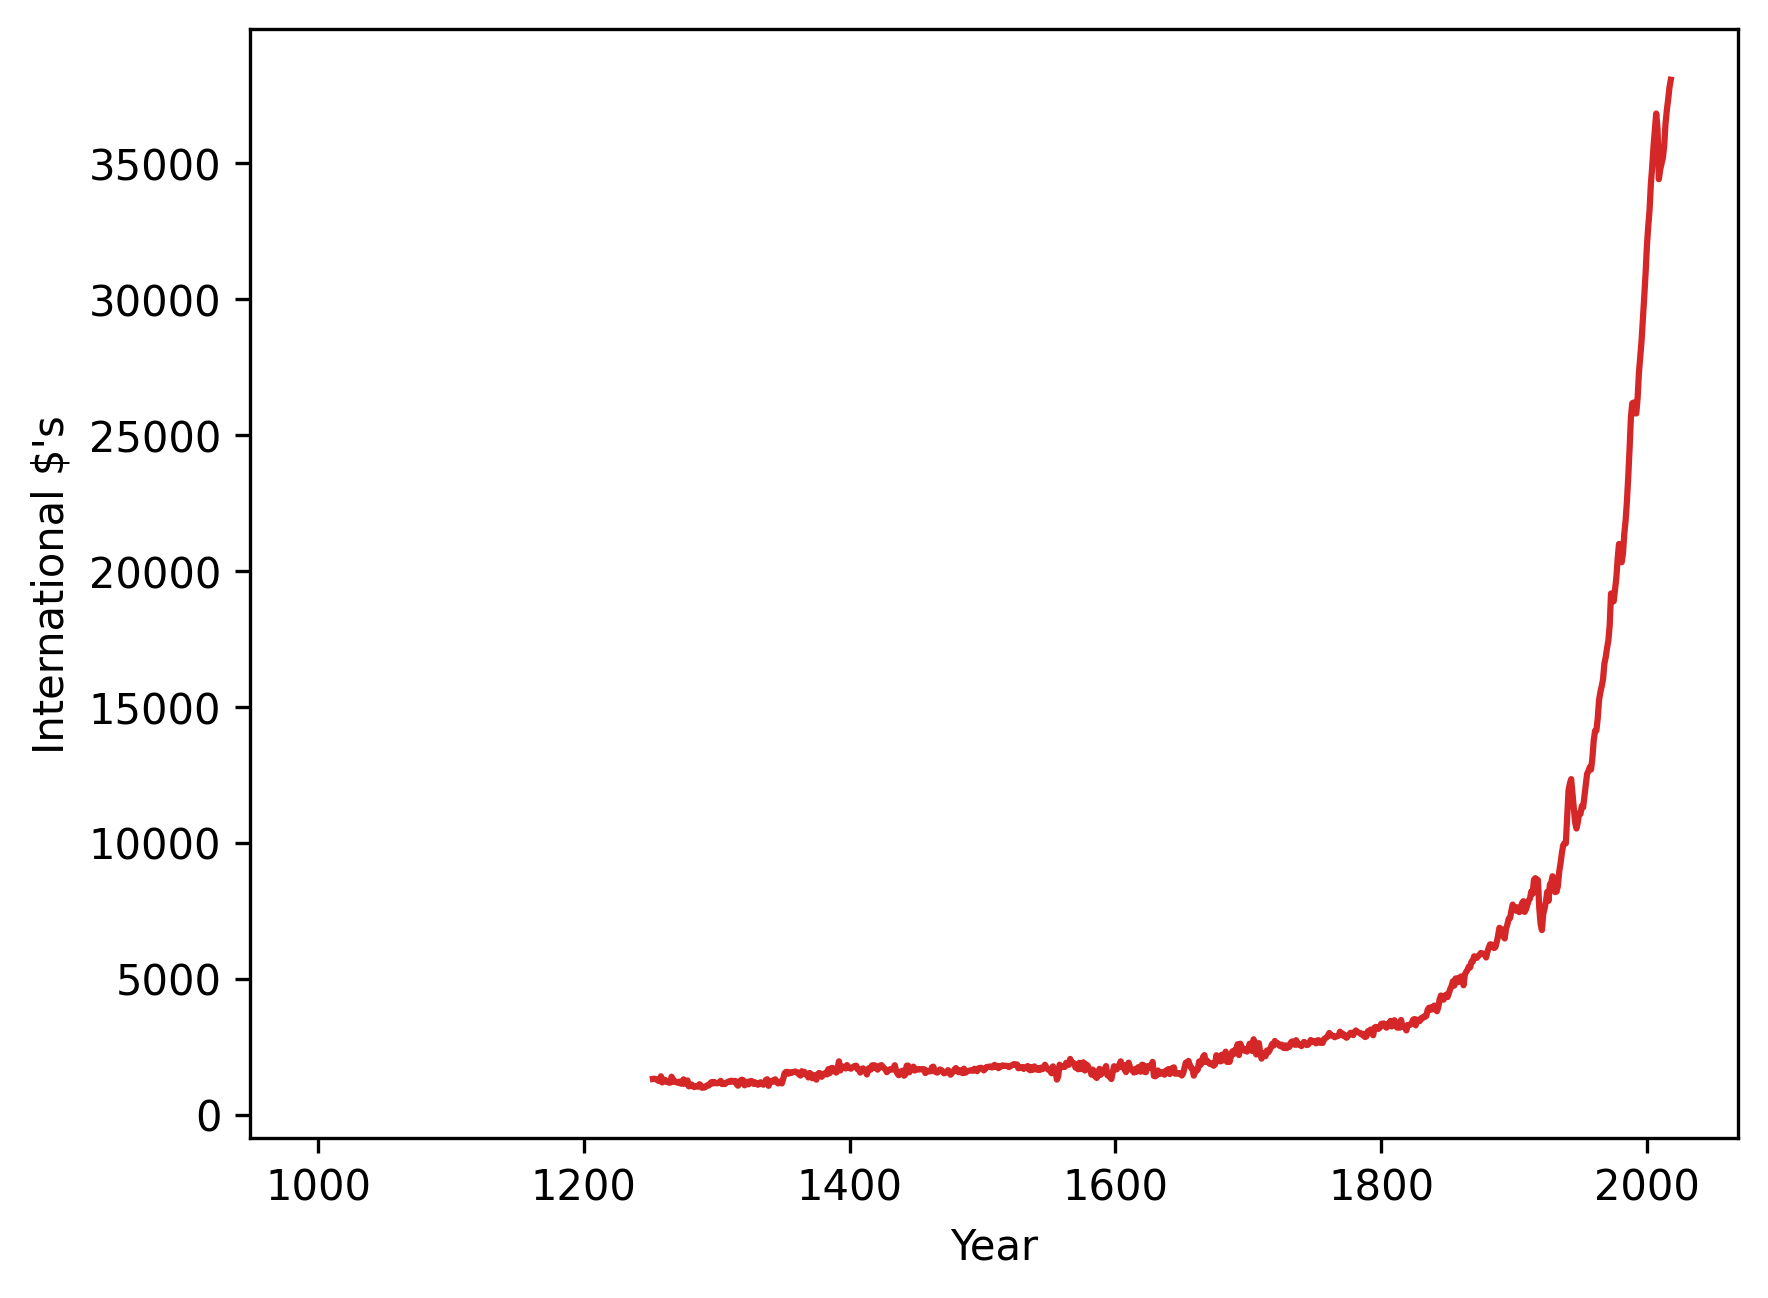

In [27]:
fig, ax = plt.subplots(dpi=300)
country = "GBR"
_ = gdppc[country].plot(
    ax = fig.gca(),
    ylabel = "International $\'s",
    xlabel = "Year",
    linestyle = "-",
    color=color_mapping["GBR"])

<center>Fig 1.1 - GDP Per Capita (GBR)</center>

**Note:** *International Dollars* are a hypotetical unit of currency that has the same PPP that the U.S. Dollar has in the United States at any given time.

Since the data is non-continuous for longer periods in the early 250 years of the millennium, it's possible to interpolate to get a continuous line plot. The dashed lines will indicate interpolated trends:

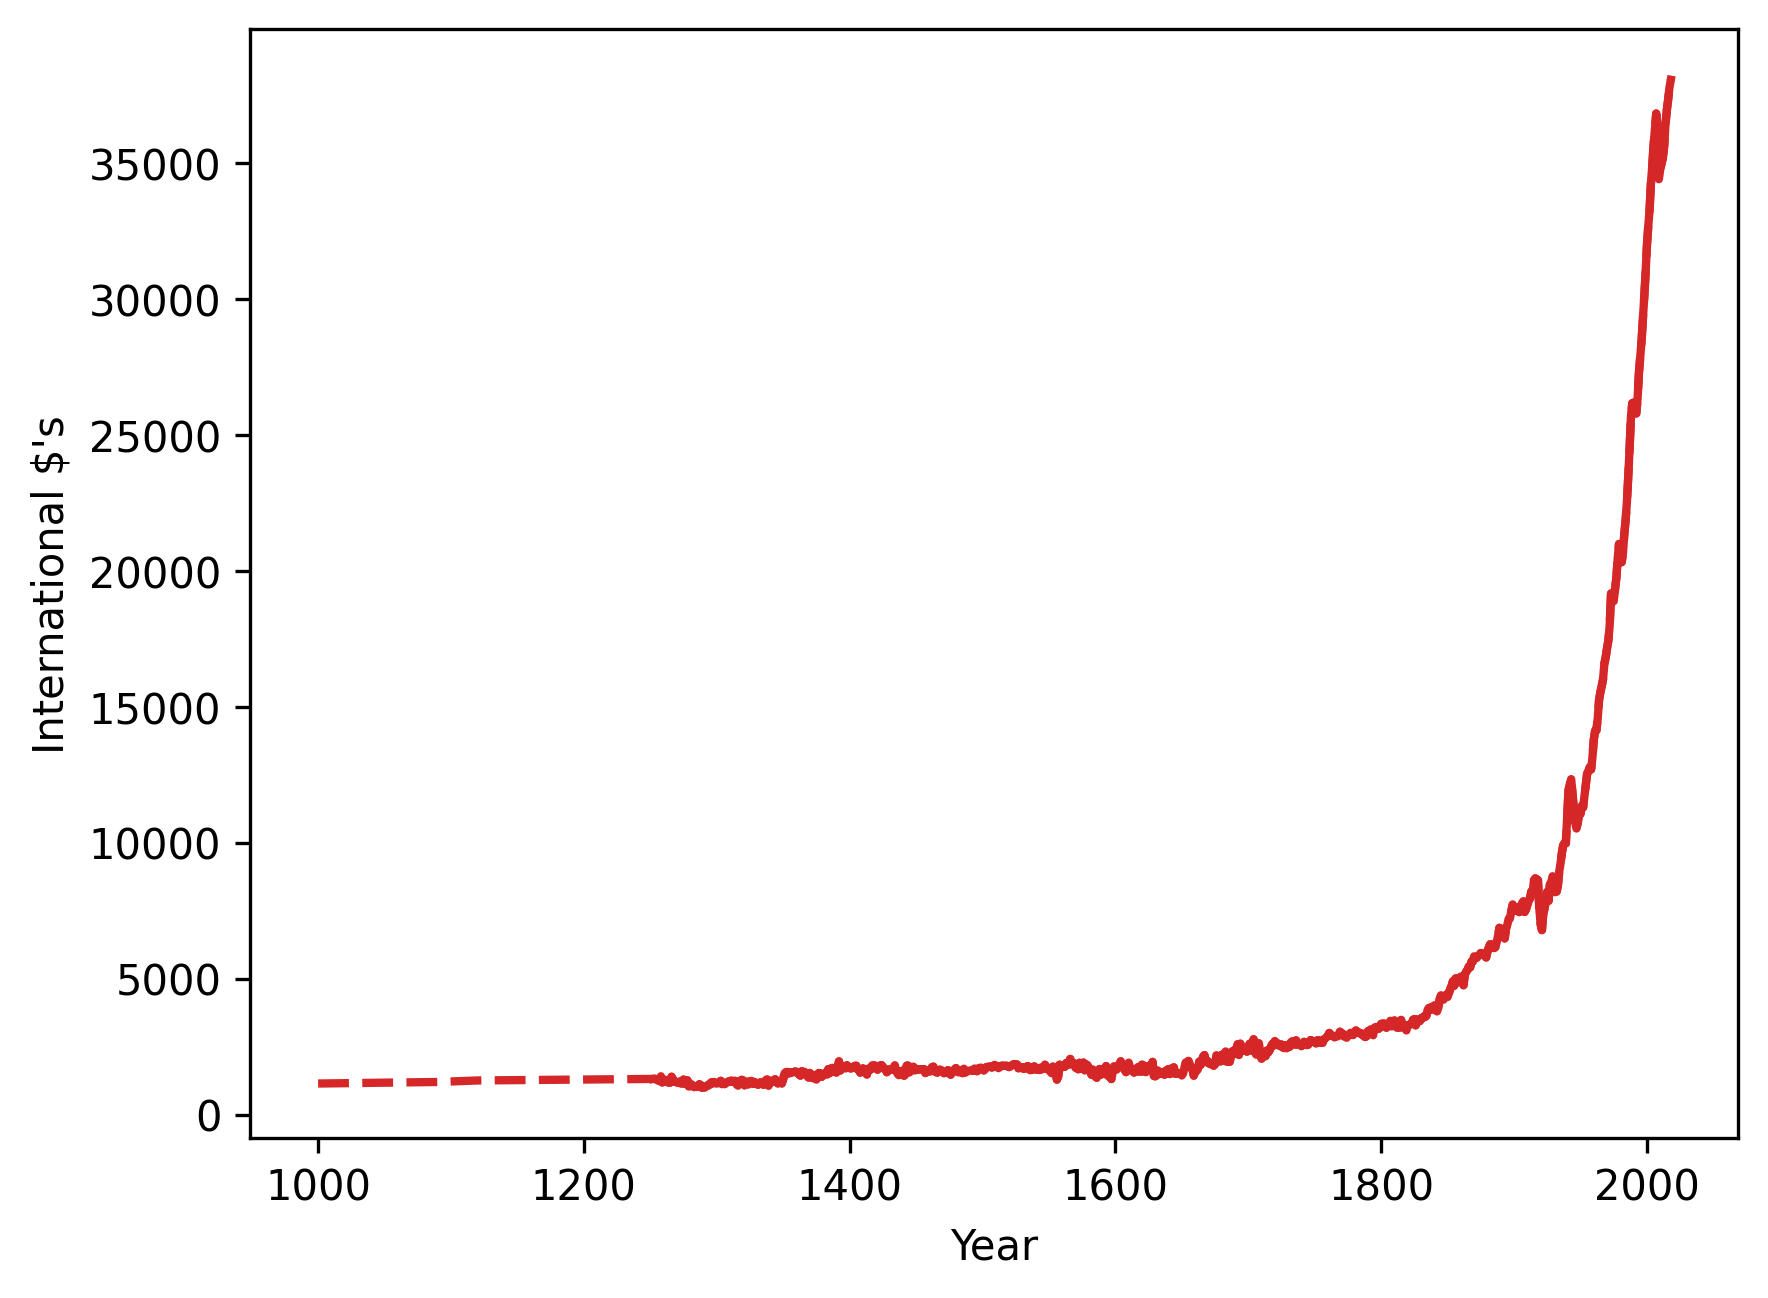

In [28]:
fig, ax = plt.subplots(dpi=300)
country = "GBR"

ax.plot(gdppc[country].interpolate(),
       linestyle="--",
       lw=2,
       color=color_mapping[country])

ax.plot(gdppc[country],
       linestyle="-",
       lw=2,
       color=color_mapping[country])

ax.set_ylabel("International $\'s")
ax.set_xlabel("Year")
plt.show()

<center>Fig 1.2 - GDP Per Capita (GBR)</center>

### 4) Function to generate plots

Now that the data has been transformed in a way that makes filtering easier, and there is a defined color mapping and style for graphics, it is possible to put it all into a function to generate plots for lists of countries.

In [36]:
def draw_interp_plots(series, ylabel, xlabel, color_mapping, code_to_name, lw, logscale, ax):
    for i, c in enumerate(countries):
        # Getting the interpolated data
        df_interpolated = series[c].interpolate(limit_area="inside")
        interpolated_data = df_interpolated[series[c].isnull()]

        # Plot the interpolated data with dashed lines
        ax.plot(interpolated_data,
                linestyle="--",
                lw=lw,
                alpha=0.7,
                color=color_mapping[c])
        
        # PLot the non-interpolated data with solid lines
        ax.plot(series[c],
                linestyle="-",
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,
                label=code_to_name.loc[c]["country"])

        if logscale == True:
            ax.set_yscale("log")

    # Draw the legend outside the plot
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    return ax

### 5) Example of Analysis

- According to the *Fig 1.2* the economic growth in Great Britain started in the 18th century and continued onwards. How would this compare to other countries growth trajectories?
- We can take a look at the United States (USA), United Kingdom (GBR), and China (CHN).

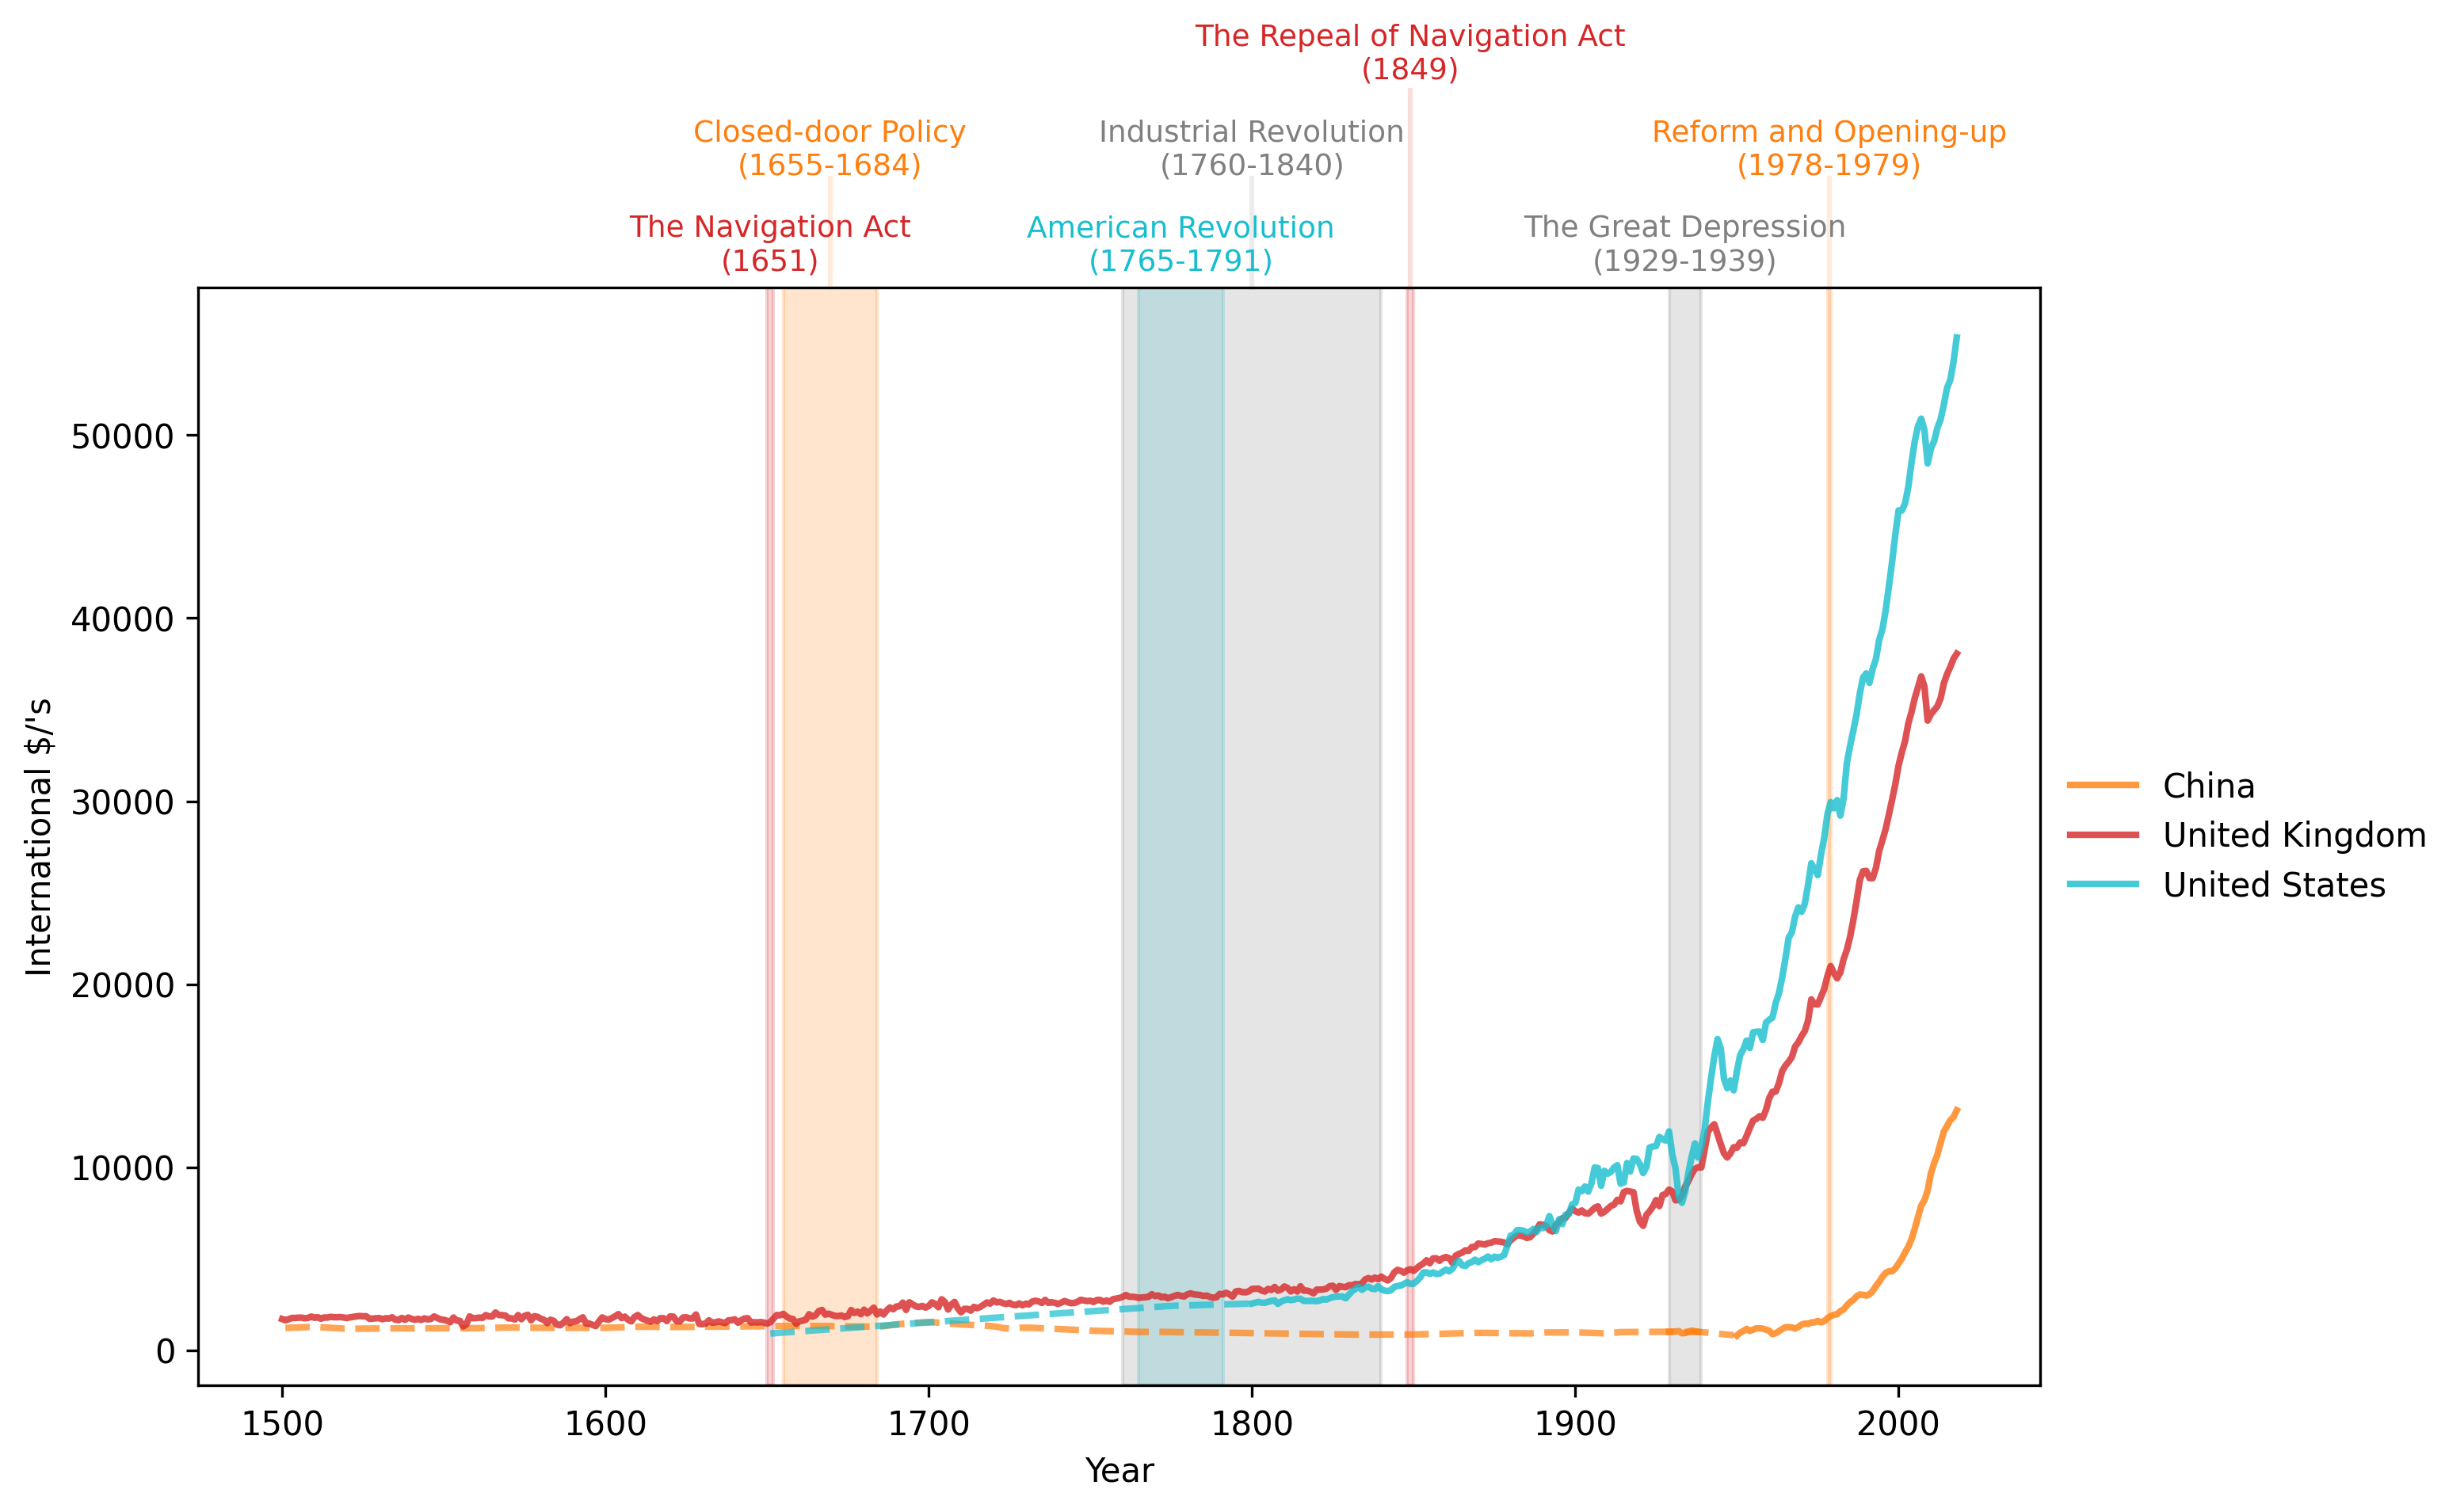

In [45]:
# Define a namedtuple for the events
Event = namedtuple("Event", ["year_range", "y_text", "text", "color", "ymax"])

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

countries = ["CHN", "GBR", "USA"]
ax = draw_interp_plots(gdppc[countries].loc[1500:],
                       "International $/'s", "Year",
                       color_mapping, code_to_name, 2, False, ax)

# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {"color": "grey", "alpha": 0.2}
t_params = {"fontsize": 9, "va":"center", "ha":"center"}

# Create a list of events to annotate
events = [
    Event((1650, 1652), ylim + ylim * 0.04,
          "The Navigation Act\n(1651)",
          color_mapping["GBR"], 1),
    Event((1655, 1684), ylim + ylim*0.13,
          "Closed-door Policy\n(1655-1684)",
         color_mapping["CHN"], 1.1),
    Event((1848, 1850), ylim + ylim*0.22,
          "The Repeal of Navigation Act\n(1849)",
          color_mapping["GBR"], 1.18),
    Event((1765, 1791), ylim + ylim*0.04,
          "American Revolution\n(1765-1791)",
          color_mapping["USA"], 1),
    Event((1760, 1840), ylim + ylim*0.13,
          "Industrial Revolution\n(1760-1840)",
          "grey", 1.1),
    Event((1929, 1939), ylim + ylim*0.04,
          "The Great Depression\n(1929-1939)",
          "grey", 1),
    Event((1978, 1979), ylim + ylim*0.13,
          "Reform and Opening-up\n(1978-1979)",
          color_mapping["CHN"], 1.1)
]

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid,
                event.y_text, event.text,
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1,
                   ymax=event.ymax, color=event.color,
                   linestyle="-", clip_on=False, alpha=0.15)

draw_events(events, ax)
plt.show()

<center>Fig 1.3 - GDP Per Capita, 1500 - (China, GBR, USA)</center>